<a href="https://colab.research.google.com/github/leifolson/mlep/blob/main/ModelDriftBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Drift Basics
Taking some time to explore some concepts in tracking various aspects of model drift.

In [4]:
!pip install alibi -q
!pip install alibi-detect -q

In [5]:
import alibi
from alibi_detect.cd import TabularDrift
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

## Data Drift

In [7]:
wine_data = load_wine()
feature_names = wine_data.feature_names
X, y = wine_data.data, wine_data.target

In [8]:
Xref, Xtest, yref, ytest = train_test_split(X, y, test_size=.5, random_state=42)

In [10]:
cd = TabularDrift(x_ref=Xref, p_val=.05)

/usr/local/lib/python3.10/dist-packages/alibi_detect/cd/tabular.py:113: UserWarning: No `categories_per_feature` dict provided so all features are assumed to be numerical. `KSDrift` will be applied to all features.
  warnings.warn('No `categories_per_feature` dict provided so all features are assumed to be numerical. '


In [15]:
drift_pred = cd.predict(Xtest)['data']['is_drift']

In [16]:
print('Drift: {}'.format('Yes' if drift_pred == 1 else 'No'))

Drift: No


So no drift has been found between the reference and test data.  Which is to say they don't have a significantly different distribution of values.

Let's mess with the data a bit to see what happens.

In [17]:
Xtest_scaled = 1.2*Xtest
drift_pred = cd.predict(Xtest_scaled)['data']['is_drift']

In [18]:
print('Drift: {}'.format('Yes' if drift_pred == 1 else 'No'))

Drift: Yes


We can see that the shift in values has been identified as data drift.

## Concept Drift

In [22]:
from alibi_detect.cd import MMDDriftOnline

In [30]:
ert = 50 # expected run time
window_size = 10
cd = MMDDriftOnline(Xref, ert, window_size, backend='tensorflow', n_bootstraps=2500)

Generating permutations of kernel matrix..


Computing thresholds: 100%|██████████| 10/10 [01:00<00:00,  6.01s/it]


Simulating online data coming in with data we already have in hand

In [34]:
preds = [cd.predict(Xref[i,:]) for i in range(Xref.shape[0])]
driftvals = [p['data']['is_drift'] for p in preds]

In [43]:
import numpy as np
import matplotlib.pyplot as plt

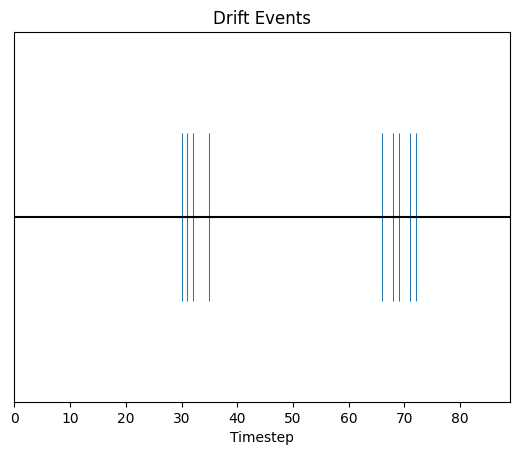

In [77]:
# plot:
fig, ax = plt.subplots()

drift_events = [i for i in range(len(driftvals)) if driftvals[i] == 1]
ax.eventplot(drift_events, orientation="horizontal", linewidth=0.75)
ax.axhline(1, color='k')
ax.set(xlim=(0, len(driftvals)))
ax.set_title('Drift Events')
ax.set_xlabel('Timestep')
plt.yticks([])
plt.show()